In [ ]:
#Stock prices calculation below

ERROR: Error in dim(ordered) <- ns: dims [product 1] do not match the length of object [0]


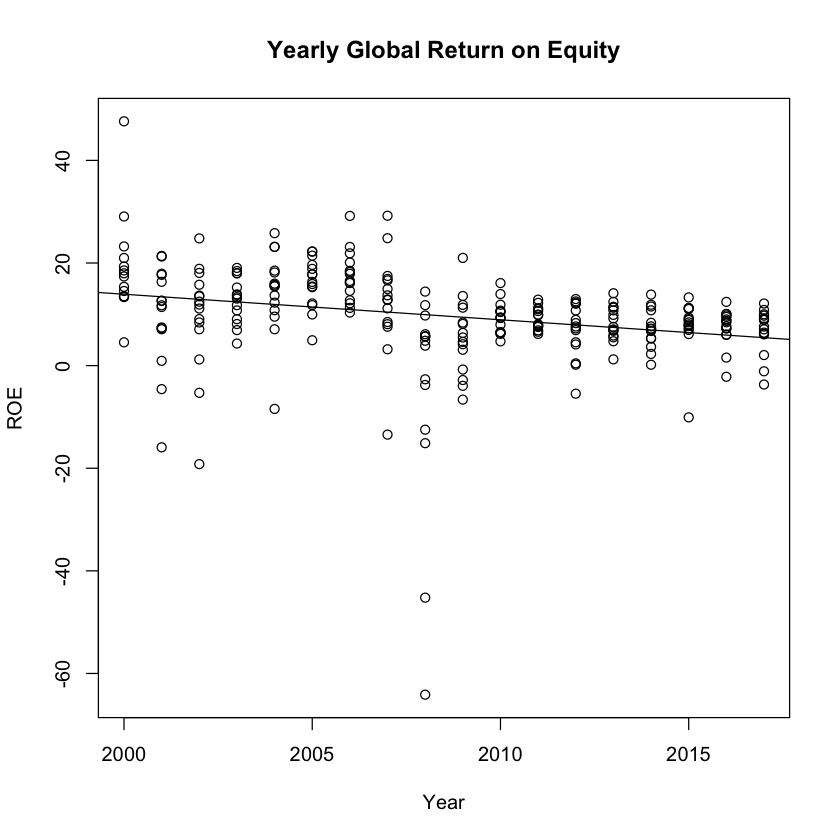

In [44]:
#Import the libraries we need
library(ggplot2)
library(reshape2)

#Vectors for regions
asia <- c("JPN", "SGP", "KOR")
europe <- c("GBR", "FRA", "DEU", "NLD", "CHE")
usa <- ("USA")

#Import data 

europe_asia <- read.csv("/Users/simon/Documents/GitHub/Programming-with-R/europe_Asia.csv", 
                        header = TRUE, sep = ",")

america <- read.csv("/Users/simon/Documents/GitHub/Programming-with-R/america.csv", 
                    header = TRUE, sep = ",")

merged_data <- merge(europe_asia, america, all = TRUE)

# bringing everything into long format
library(reshape2)

banks_Global <- melt(merged_data, id.var = c("company_name", "year", "country", "currency"), 
                     measure.vars = c("amortization_of_deferred_charges", "total_assets", "common_equity", 
                                      "cogs", "depreciation_depletion_amortization", "ebit", 
                                      "income_before_extraordinary_items", "income_before_extraordinary_items_cashflow", 
                                      "total_interest_income", "operating_income_before_depreciation", "revenues", 
                                      "total_interest_expense", "interest_expense_long_term_debt", "staff_expense", 
                                      "expense_non_interest_bank", "operating_expense", "pension_and_retirement_expense", 
                                      "research_and_development_expense", "rental_expense", "ROE", "ROA", 
                                      "cost_to_income_interest", "cost_to_income", "EBIT_Margin", "net_interest_margin"))

selection_ROE <- banks_global$variable == "ROE"
banks_global_ROE <- banks_global[selection_ROE,]



#Create the new data we need
selection_ROE <- banks_global$variable == "ROE"
banks_global_ROE <- banks_global[selection_ROE,]


#Now when the selection has been made, we can make a plot. 
# GLOBAL
p <- plot(banks_global_ROE$year, banks_global_ROE$value, 
          main = "Yearly Global Return on Equity", 
          xlab = "Year", ylab = "ROE" )
abline(lm(value ~ year, data = banks_global_ROE))


# HERE we do AMERICA
selection_ROE_USA <- banks_global$variable == "ROE" & banks_global$country %in% usa
banks_ROE_USA <- dcast(banks_global[selection_ROE_USA, ], company_name ~ year, value.var = "value")

p_ROE <- ggplot(banks_global[selection_ROE_USA,], aes(year, value))
p_ROE + geom_point()


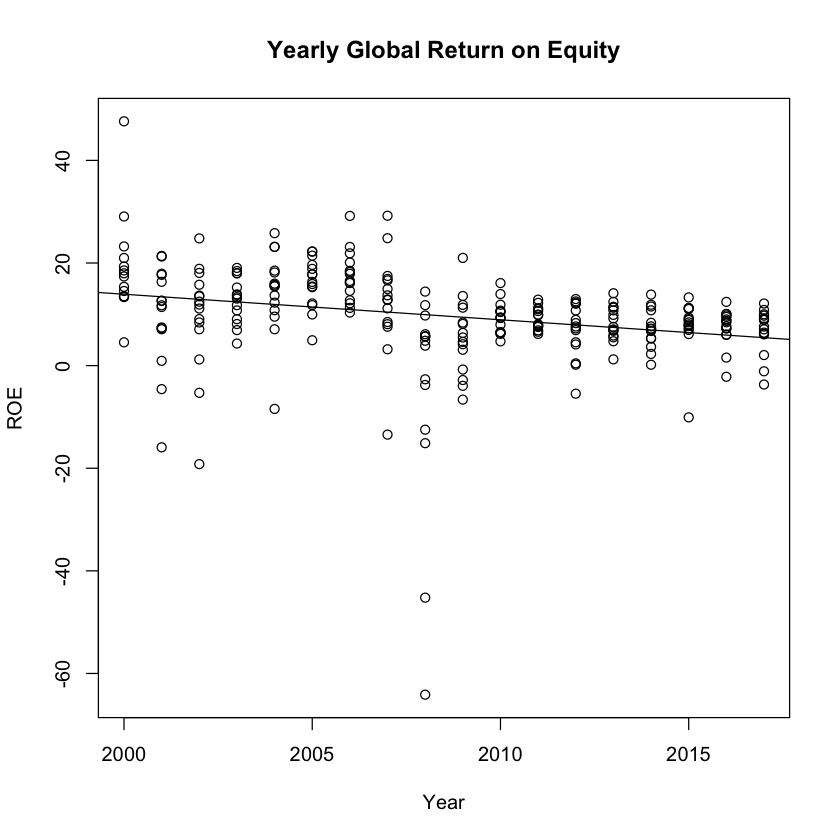

In [42]:
# HERE we do AMERICA
selection_ROE_USA <- banks_global$variable == "ROE" & banks_global$country %in% usa
banks_ROE_USA <- dcast(banks_global[selection_ROE_USA, ], 
                       company_name ~ year, value.var = "value")

p_ROE <- ggplot(banks_global[selection_ROE_USA,], aes(year, value))
p_ROE + geom_point()

ERROR: Error in dim(ordered) <- ns: dims [product 1] do not match the length of object [0]


In [ ]:
#Roa calculation below

In [40]:
# ROA Global
library(ggplot2)
library(reshape2)

# import global data 
europe_asia <- read.csv("/Users/gustaf/Documents/GitHub/Programming-with-R/europe_Asia.csv", 
                        header = TRUE, sep = ",")

america <- read.csv("/Users/gustaf/Documents/GitHub/Programming-with-R/america.csv", 
                        header = TRUE, sep = ",")

merged_data <- merge(europe_asia, america, all = TRUE)

# bringing everything into long format
banks_global <- melt(merged_data, id.var = c("company_name", "year", "country"), 
                     measure.vars = c("amortization_of_deferred_charges", "total_assets", "common_equity", 
                                      "cogs", "depreciation_depletion_amortization", "ebit", 
                                      "income_before_extraordinary_items", "income_before_extraordinary_items_cashflow", 
                                      "total_interest_income", "operating_income_before_depreciation", "revenues", 
                                      "total_interest_expense", "interest_expense_long_term_debt", "staff_expense", 
                                      "expense_non_interest_bank", "operating_expense", "pension_and_retirement_expense", 
                                      "research_and_development_expense", "rental_expense", "ROE", "ROA", 
                                      "cost_to_income_interest", "cost_to_income", "EBIT_Margin", "net_interest_margin"))

# selecting roa values and rows
selectionROA_global <- banks_global$variable == "ROA"

banks_global_ROA <- banks_global[selectionROA_global, ]

# plot trends
plotROA_global <- ggplot(banks_global_ROA, aes(year, value)) + geom_point()
plotROA_global + labs(title = "Yearly Global Return on Assets", x = "Year", y = "ROA") + stat_smooth(method = "lm")

Warning message in file(file, "rt"):
“cannot open file '/Users/gustaf/Documents/GitHub/Programming-with-R/europe_Asia.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


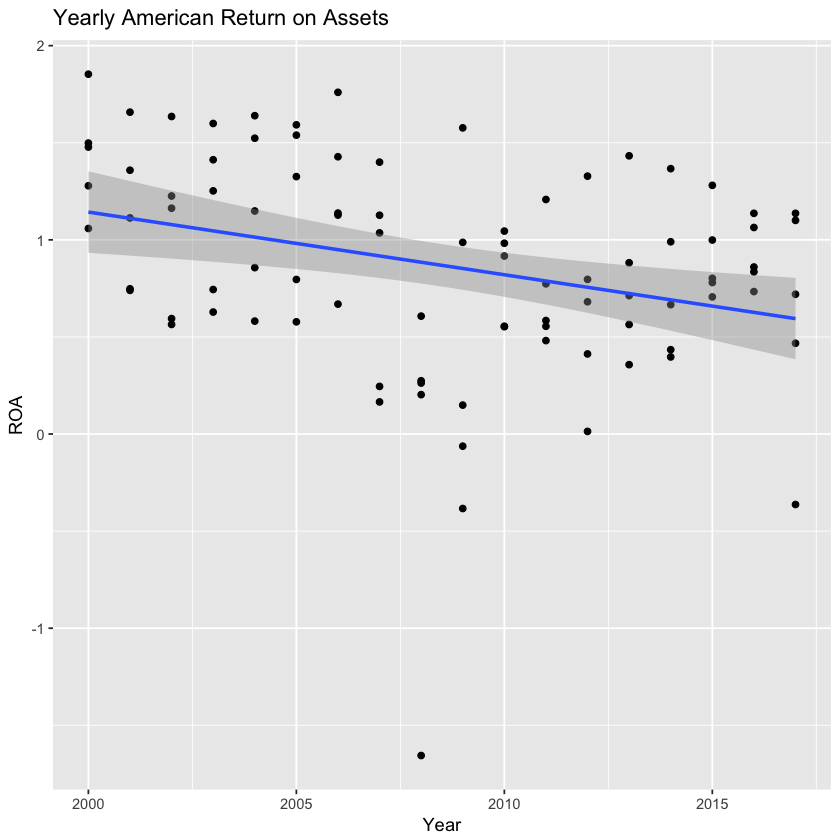

In [7]:
#"cost_to_income_interest"
#"income_before_extraordinary_items_cashflow"

# ROA America
library(ggplot2)
library(reshape2)

#import american banks data
american_banks_data <- read.csv("/Users/gustaf/Documents/GitHub/Programming-with-R/america.csv", 
                        header = TRUE, sep = ",")

# long format transformation
american_banks <- melt(american_banks_data, id.var = c("company_name", "year", "country"), 
                     measure.vars = c("amortization_of_deferred_charges", "total_assets", "common_equity", 
                                      "cogs", "depreciation_depletion_amortization", "ebit", 
                                      "income_before_extraordinary_items", 
                                      "total_interest_income", "operating_income_before_depreciation", "revenues", 
                                      "total_interest_expense", "interest_expense_long_term_debt", "staff_expense", 
                                      "expense_non_interest_bank", "operating_expense", "pension_and_retirement_expense", 
                                      "research_and_development_expense", "rental_expense", "ROE", "ROA", 
                                      "cost_to_income", "EBIT_Margin", "net_interest_margin"))

# selecting data to plot
selectionROA_america <- american_banks$variable == "ROA"

american_banks_ROA <- american_banks[selectionROA_america, ]

# plot trends
plotROA_america <- ggplot(american_banks_ROA, aes(year, value)) + geom_point()
plotROA_america + labs(title = "Yearly American Return on Assets", x = "Year", y = "ROA") + stat_smooth(method = "lm")

In [ ]:
#Roe calculation below